# Week 3 ‒ 클로젯셰어 데이터를 이용해서 신규가입자 특성 파악하기

## 필수분석
<b>1. 구매 소요 시간 분석<br></b>

1-1. 가입일로부터 구매일까지 전환된 소요시간 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과


<b>2. 구매 상품 트렌드 분석<br></b>

2-1. 유저당 주문 수량 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석

2-2. 주문 아이템 분석<br>
- 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
- 신규 유저들의 구매 트렌드 파악


<b>3. 분석 내용 토대로 인사이트 도출<br></b>

3-1. 분석 내용 도식화
- 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)
- 유사성을 갖는 결과에 대하여 그룹화

3-2. 인사이트 도출
- 해당 결과를 통해 나타나는 사항 정리
- 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

## 추가분석
<b>1. 분석 결과물 – AARRR에 기반한 분석</b>
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(셰어러 입장에서)
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(구매자 입장에서)<br>

<b>2. 분석 결과물 2 - 유저별 그룹핑(코호트)에 기반한 분석</b><br>

<b>3. 분석 결과물 3 – 특정 브랜드/특정 아이템에 대해 수요가 집중되는 경향성이 있는지 분석</b>

## 컬럼 설명
- brandnm : 아이템 브랜드명
- goodsnm : 아이템 명
- user : 개별 유저 식별 값
- reg_date : 개별 유저 가입일
- order_date : 아이템 주문일
- p_type : 주문 상품 종류 (7days (7일권) / 4days (4일권))
- sub_type : 주문 상품 카테고리 (BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP– 투피스)
- app_yn : 어플리케이션 사용 여부 (Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용)

# 데이터 탐색

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.float_format = '{:20,.1f}'.format
pd.options.display.max_colwidth = 99
pd.options.display.max_columns = 99
np.random.seed(42)

In [3]:
df = pd.read_excel('클로젯셰어_과제DB 대체 자료.xlsx').rename(columns=str.lower)
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


## 기본정보 확인

In [4]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [6]:
for col in df.columns:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].nunique()}")
    print()

Column명: brandnm
Unique값: 245

Column명: goodsnm
Unique값: 979

Column명: user
Unique값: 1234

Column명: reg_date
Unique값: 368

Column명: order_date
Unique값: 90

Column명: p_type
Unique값: 2

Column명: sub_type
Unique값: 6

Column명: app_yn
Unique값: 1



In [7]:
for col in df[['brandnm', 'sub_type']]:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].unique()}")
    print()

Column명: brandnm
Unique값: ['Gucci' 'El estilo de Claire' 'Danha' 'Burberry London' 'Prada'
 'Max Mara' 'Molliolli' 'Sandro' 'Louis Vuitton' 'Tory Burch' 'Chloe'
 'Time' 'The Izzat' 'Mojosphine' 'Ted Baker' '& Other Stories' 'Fendi'
 'Balmain' 'Celine' 'Burberry' 'Chanel' 'Dior' 'Bottega Veneta'
 'Plastic Island' 'Reneevon' 'Sorry Too Much Love' 'Saint Laurent'
 'Miu Miu' 'Yves Saint Laurent' 'Zooc' 'Vivienne Westwood'
 'Maison Kitsune' 'Margarin fingers' 'The Tint' 'Love Moschino' 'Michaa'
 'Vivienne Westwood Red Label' 'MSGM' 'Christian Dior' 'It michaa' 'SJSJ'
 'Amsale' 'Imvely' 'Chi Chi London' 'Maje' 'Biker Starlet' 'Thom Browne'
 'Jill By Jill Stuart' 'Comme des Garcons' 'Nain' 'Dolce & Gabbana'
 'Givenchy' 'Salvatore Ferragamo' 'Andersen-Andersen' 'A.P.C.'
 'Self-portrait' 'Sonia Rykiel' 'Diane von Furstenberg' 'Hugo Boss'
 'Baum Und Pferdgarten' 'BCBG' 'Lmml Studio' 'Nike' 'Not Your Rose' nan
 'Jigott' 'Escada' 'Diagonal' 'System' 'On&On' 'Lucky Chouette'
 'The Clozet' 'Allen.O'

In [8]:
df.isnull().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

### ⚡<b>데이터셋 이해</b>⚡
- 1234명 유저가 2021-01-01~2021-03-31 기간에 서비스를 이용한 내역
- 가입일은 2017-06-24~2021-03-31일 기간에 걸쳐 분포
- 6개 카테고리에 걸쳐 245개 브랜드, 979개 제품이 대여됨
- 결측치가 있는 brandnm, reg_date, app_yn 컬럼에 대한 처리 필요

## brandnm이 결측치인 경우

In [9]:
df[df['brandnm'].isnull()].head(10)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket skyblue & slit basic pattern skirt skyblue,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail long mermaid skirt,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pattern jogger-pants grey,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket basic pattern slacks black,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi & tweed pattern skirt multi,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square neck dress,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print top_pleats fake leather skirt ash,a1107090,2020-07-03,2021-01-17,4days,TP,Y


### ⚡<b>처리방법</b>⚡
- brandnm 컬럼의 null값인 경우는 sub_type이 투피스(TP)인 경우에 해당하며, goodsnm 컬럼에 2개 제품명이 &으로 연결되어 있음
- 홈페이지 검색시 2개의 brandnm이 조회됨 -> 크롤링 방법을 찾거나 수기로 정보를 가져올 수 있을 것으로 보임

## reg_date이 결측치인 경우

In [10]:
# reg_date 컬럼의 null값 확인
df[df['reg_date'].isnull()]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,NaN
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,NaN
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


In [11]:
# 주어진 데이터 인덱스 기준으로는 결측치 앞뒤 reg_date 데이터에 일정한 규칙 보이지 않음
reg_date_null = df[df['reg_date'].isnull()].index.tolist()
for i in reg_date_null:
    pre_con = df.loc[i-2:i+2,['user', 'reg_date','order_date']]
    print(pre_con)

         user   reg_date order_date
263  a1144042 2021-01-22 2021-01-22
264  a1141954 2021-01-10 2021-01-22
265  a1144008        NaT 2021-01-21
266   a186345 2020-03-04 2021-01-21
267   a121913 2019-05-05 2021-01-21
         user   reg_date order_date
349   a152462 2019-10-30 2021-01-18
350  a1141029 2021-01-04 2021-01-18
351  a1142855        NaT 2021-01-18
352  a1143692 2021-01-18 2021-01-18
353  a1143683 2021-01-18 2021-01-18
         user   reg_date order_date
562  a1126491 2020-10-24 2021-02-18
563  a1145696 2021-02-06 2021-02-18
564  a1146490        NaT 2021-02-18
565  a1146744 2021-02-17 2021-02-18
566  a1145314 2021-02-03 2021-02-18
         user   reg_date order_date
744  a1145073 2021-02-01 2021-02-04
745  a1145436 2021-02-04 2021-02-04
746  a1145478        NaT 2021-02-04
747  a1145479 2021-02-04 2021-02-04
748  a1102098 2020-05-29 2021-02-04
          user   reg_date order_date
1252  a1147974 2021-03-02 2021-03-12
1253  a1148861 2021-03-10 2021-03-12
1254  a1149094        NaT

In [12]:
df.groupby('user')['reg_date'].agg('min').reset_index().sort_values(by = 'reg_date')

,user,reg_date
1057,a11612,2017-06-24
1063,a11803,2017-07-02
1083,a13637,2018-03-09
1085,a13741,2018-03-20
1091,a13934,2018-03-27
...,...,...
284,a1142855,NaT
330,a1144008,NaT
476,a1145478,NaT
558,a1146490,NaT


In [13]:
# 유저 일련번호가 reg_date 순으로 부여되었는지 확인
user_check = df.groupby('user')['reg_date'].agg('min').reset_index().sort_values(by = 'reg_date')
user_check['user_num'] = user_check['user'].str[1:].astype(int)
user_check

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
284,a1142855,NaT,1142855
330,a1144008,NaT,1144008
476,a1145478,NaT,1145478
558,a1146490,NaT,1146490


In [14]:
# 유저 아이디의 일련번호는 reg_date 순으로 부여된 것으로 보이나 중간중간 끝자리 숫자가 누락된 데이터가 확인됨

user_check_list = []
print('Conseq 일련번호 누락으로 추정되는 건')
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check_list.append('a')
            print(f'Prev: {user_check["user_num"][i]} | Conseq: {user_check["user_num"][i+1]}')
        else:
            user_check_list.append('b')
    except:
        pass

print("")
print('등록일 기준 오름차순 정렬시 유저 아이디 일련번호 비교')
print(f'Prev user_num > Conseq user_num : {user_check_list.count("a")}')
print(f'Prev user_num < Conseq user_num : {user_check_list.count("b")}')

Conseq 일련번호 누락으로 추정되는 건
Prev: 1102098 | Conseq: 110231
Prev: 1102611 | Conseq: 110269
Prev: 1107269 | Conseq: 110727
Prev: 1109404 | Conseq: 110947
Prev: 1110250 | Conseq: 111030
Prev: 1110928 | Conseq: 111093
Prev: 1112718 | Conseq: 111344
Prev: 1114519 | Conseq: 111461
Prev: 1119556 | Conseq: 112000
Prev: 1120886 | Conseq: 112106
Prev: 1123164 | Conseq: 112319
Prev: 1136719 | Conseq: 113690
Prev: 1143269 | Conseq: 114327
Prev: 1149833 | Conseq: 114984
Prev: 1151564 | Conseq: 115159
Prev: 116095 | Conseq: 11612
Prev: 117741 | Conseq: 11803
Prev: 134855 | Conseq: 13637
Prev: 136403 | Conseq: 13741
Prev: 139044 | Conseq: 13934
Prev: 140509 | Conseq: 14083
Prev: 142390 | Conseq: 14279
Prev: 154850 | Conseq: 15568
Prev: 161609 | Conseq: 16232
Prev: 168919 | Conseq: 16928
Prev: 170041 | Conseq: 17062
Prev: 185643 | Conseq: 18567
Prev: 186345 | Conseq: 18660
Prev: 191314 | Conseq: 19187
Prev: 198621 | Conseq: 19897
Prev: 199421 | Conseq: 19983

등록일 기준 오름차순 정렬시 유저 아이디 일련번호 비교
Prev user_num >

In [15]:
# 유저 일련번호가 끝자리 숫자가 누락된 것으로 추정되는 건은 끝에 0을 붙여도 reg_date 순으로 부여된 순서는 유지됨
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            if user_check['user_num'][i].astype(str)[:-1] == user_check['user_num'][i+1].astype(str):
                print('a')
    except:
        pass

In [16]:
user_check['user'] + str(0)

1057      a116120
1063      a118030
1083      a136370
1085      a137410
1091      a139340
          ...    
284     a11428550
330     a11440080
476     a11454780
558     a11464900
826     a11490940
Name: user, Length: 1234, dtype: object

In [17]:
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check['user_new'][i+1] = str(user_check['user_num'][i+1]) + str(0)
        else:
            user_check['user_new'][i+1] = user_check['user'][i+1]
    except:
        pass

user_check

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
284,a1142855,NaT,1142855
330,a1144008,NaT,1144008
476,a1145478,NaT,1145478
558,a1146490,NaT,1146490


In [18]:
user_check_final = user_check.sort_values(by = 'user_num')
user_check_final

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
1048,a1151479,2021-03-31,1151479
1049,a1151481,2021-03-31,1151481
1050,a1151496,2021-03-31,1151496
1051,a1151499,2021-03-31,1151499


In [19]:
reg_date_null = user_check_final[user_check_final['reg_date'].isnull()].index.tolist()
for i in reg_date_null:
    pre_con = user_check_final.loc[i-2:i+2,['user', 'reg_date','user_num']]
    print(pre_con)

         user   reg_date  user_num
282  a1142838 2021-01-13   1142838
283  a1142841 2021-01-13   1142841
284  a1142855        NaT   1142855
285  a1142902 2021-01-14   1142902
286  a1142914 2021-01-14   1142914
         user   reg_date  user_num
328  a1143946 2021-01-21   1143946
329  a1143948 2021-01-21   1143948
330  a1144008        NaT   1144008
331  a1144011 2021-01-21   1144011
332  a1144042 2021-01-22   1144042
         user   reg_date  user_num
474  a1145467 2021-02-04   1145467
475  a1145471 2021-02-04   1145471
476  a1145478        NaT   1145478
477  a1145479 2021-02-04   1145479
478  a1145482 2021-02-04   1145482
         user   reg_date  user_num
556  a1146476 2021-02-15   1146476
557  a1146489 2021-02-15   1146489
558  a1146490        NaT   1146490
559  a1146514 2021-02-15   1146514
560  a1146516 2021-02-15   1146516
         user   reg_date  user_num
824  a1149051 2021-03-12   1149051
825  a1149062 2021-03-12   1149062
826  a1149094        NaT   1149094
827  a1149124 2021-0

In [20]:
for i in range(0, user_check_final.shape[0]):
    if pd.isnull(user_check_final['reg_date'][i]):
        user_check_final.loc[i, 'reg_date'] = user_check_final.loc[i+1, 'reg_date']
user_check_final[user_check_final.index.isin(reg_date_null)]

,user,reg_date,user_num
284,a1142855,2021-01-14,1142855
330,a1144008,2021-01-21,1144008
476,a1145478,2021-02-04,1145478
558,a1146490,2021-02-15,1146490
826,a1149094,2021-03-12,1149094


In [21]:
# 전처리 단계에서 df 데이터셋에 머지 예정
user_reg_date = user_check_final[['user', 'reg_date']]
user_reg_date

,user,reg_date
1057,a11612,2017-06-24
1063,a11803,2017-07-02
1083,a13637,2018-03-09
1085,a13741,2018-03-20
1091,a13934,2018-03-27
...,...,...
1048,a1151479,2021-03-31
1049,a1151481,2021-03-31
1050,a1151496,2021-03-31
1051,a1151499,2021-03-31


### ⚡<b>처리방법</b>⚡
- 유저 아이디 일련번호는 reg_date 기준으로 부여된 것으로 보임
- 유저 아이디의 일련번호를 기준으로 데이터를 정렬하여 reg_dat가 누락된 건의 전후 reg_date가 같으면 해당 날짜로, 전후 데이터의 reg_date가 다른 경우 둘중 한 날짜로 대체 처리

## user & order_date

In [22]:
# user 컬럼과 order_date 컬럼 관계 확인
user_order_date = df.groupby('user')['order_date'].agg(['max','min']).reset_index()
user_order_date

,user,max,min
0,a1100548,2021-03-31,2021-03-31
1,a1100887,2021-03-29,2021-03-29
2,a1101514,2021-02-05,2021-02-05
3,a1101645,2021-02-23,2021-02-23
4,a1102068,2021-03-04,2021-03-04
...,...,...,...
1229,a198621,2021-01-21,2021-01-21
1230,a19897,2021-02-16,2021-02-16
1231,a199351,2021-01-06,2021-01-06
1232,a199421,2021-02-22,2021-02-22


In [23]:
# 유저마다 주문한 날짜가 1:1로 매칭됨
for i in range(0, user_order_date.shape[0]):
    if user_order_date.loc[i, 'max'] != user_order_date.loc[i, 'min']:
        print('Multiple order dates exist for a user')
    else:
        pass

### ⚡<b>인사이트</b>⚡
- 신규가입 유저에 대한 3개월치 데이터로, 유저마다 order_date이 1:1로 매칭됨
- 주어진 데이터셋에서는 재구매 관련 분석을 진행할 수 없음

## user & goodsnm

In [24]:
# user 컬럼과 goodsnm 컬럼 관계 확인
user_goodsnm = df.groupby('user')['goodsnm'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
user_goodsnm

,user,count
851,a1149461,11
868,a1149583,10
275,a1142677,9
317,a1143701,7
1207,a189404,7
...,...,...
444,a1145218,1
443,a1145217,1
442,a1145206,1
441,a1145200,1


In [25]:
# 전체 1234명 유저 중 88.7%는 1개 아이템만 주문
user_count = user_goodsnm.loc[user_goodsnm['count']==1,'user'].count()
print(f"1개 아이템만 주문한 유저: {user_count}명, {round(user_count / user_goodsnm.shape[0] * 100, 1)}%")

1개 아이템만 주문한 유저: 1095명, 88.7%


<AxesSubplot:>

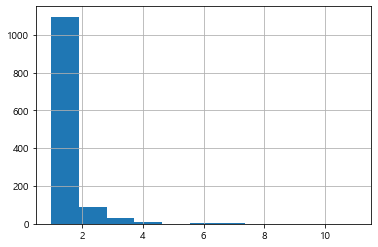

In [26]:
user_goodsnm['count'].hist(bins = 11)

### ⚡<b>인사이트</b>⚡
- 데이터셋에 정보가 있는 1234명의 유저 중 88.7%에 해당하는 1095명은 1개 아이템만을 주문하였음
- 장바구니에 함께 담은 제품을 살펴보는 연관분석을 진행할 수 있는 대상은 139명으로 제한적임

# 데이터 전처리

## reg_date 결측치

In [27]:
# reg_date의 null값 user_reg_date 정보로 대체
df = df.merge(user_reg_date, on = 'user', how = 'left').drop('reg_date_x', axis = 1).rename(columns = {'reg_date_y' : 'reg_date'})
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,NaN,2021-01-02
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,NaN,2021-01-02
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,NaN,2021-01-02
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28


## app_yn 결측치

In [28]:
# app_yn 컬럼의 null값 'N'으로 대체
df.loc[df['app_yn'].isnull(), 'app_yn'] = 'N'
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,N,2021-01-02
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,N,2021-01-02
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,N,2021-01-02
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28


# EDA

## 구매전환 소요시간 분석

- 최근 3개월 전체 분석 / 각 월별 분석
- 월별 변동사항 확인 -> 트렌드 분석 (ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과)

In [29]:
# 필요 컬럼 생성
# lag : 구매일 - 가입일 간 소요일수 계산
# lag_month : lag를 30일로 나누어 소요월 계산
# order_month : 주문월 표시

df['lag'] = (df['order_date'] - df['reg_date']).dt.days
df['lag_month'] = df['lag']/30
df['order_month'] = df['order_date'].dt.month
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date,lag,lag_month,order_month
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06,406,13.5,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,N,2021-01-02,13,0.4,1
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,N,2021-01-02,13,0.4,1
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,N,2021-01-02,13,0.4,1
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01,14,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10,691,23.0,3
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11,18,0.6,3
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28,1,0.0,3
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28,1,0.0,3


### 3개월 전체 데이터

In [30]:
# 구매전환 최소 소요일 : 0
# 구매전환 최대 소요일 : 1304
df_lag = df.groupby('user')['lag'].min().reset_index().sort_values(by = 'lag', ascending = False)
df_lag

,user,lag
1057,a11612,1304
1063,a11803,1298
1085,a13741,1107
1083,a13637,1090
1098,a14279,1073
...,...,...
741,a1148131,0
738,a1148115,0
737,a1148104,0
735,a1148097,0


<AxesSubplot:>

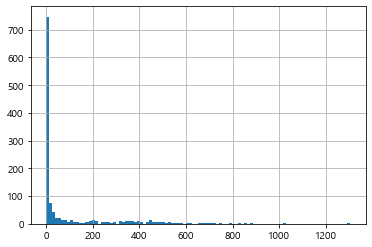

In [31]:
df_lag['lag'].hist(bins = 100)

In [32]:
# 가입일로부터 첫주문일까지 걸린 시간 lag_lvl에 6개 분류로 표기
# Sameday : 가입당일 주문 / Nextday : 가입 2일차 주문 / ~1Week : 가입 3일차 ~ 1주일 내 주문
# ~1month :가입 8일차 ~ 1개월 내 주문 / ~1year : 가입 1개월차 ~ 1년 내 주문 / 1year+ : 가입한지 1년 지나서 주문

cut_labels = ['Sameday', 'Nextday', '~1Week', '~1month', '~1year', '1year+']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_lag['lag_lvl'] = pd.cut(df_lag['lag'], bins=cut_bins, labels=cut_labels)
df_lag

,user,lag,lag_lvl
1057,a11612,1304,1year+
1063,a11803,1298,1year+
1085,a13741,1107,1year+
1083,a13637,1090,1year+
1098,a14279,1073,1year+
...,...,...,...
741,a1148131,0,Sameday
738,a1148115,0,Sameday
737,a1148104,0,Sameday
735,a1148097,0,Sameday


In [33]:
df_lag_lvl = df_lag.groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_lag_lvl.head()

,lag_lvl,count
0,Sameday,323
1,Nextday,124
2,~1Week,245
3,~1month,149
4,~1year,241


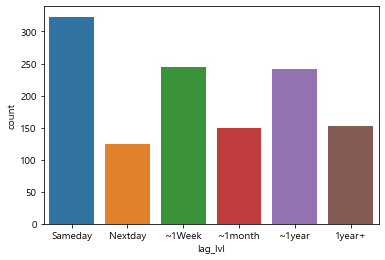

In [34]:
# 가입 당일 구매한 유저가 가장 많음 
plt.figure(figsize = (6,4))
ax = sns.barplot(x = df_lag_lvl['lag_lvl'], y = df_lag_lvl['count'])

#### ⚡<b>인사이트</b>⚡
- 전체 데이터의 구매전환 소요시간 분포를 봤을 때 당일 가입후 구매한 유저의 비중이 가장 높았음
- 구매전환 소요시간 카테고리를 어떻게 나누는 것이 가장 효율적일 추가로 고민해볼 필요가 있음

### 월별 데이터
- 월별로 lag_lvl 비율 변화 확인

In [35]:
# 사용월에 따른 lag_lvl 분포 확인
df_month = df.groupby('user')['order_month','lag'].agg({'order_month' : 'max', 'lag' : 'min'}).reset_index()
df_month

,user,order_month,lag
0,a1100548,3,319
1,a1100887,3,314
2,a1101514,2,256
3,a1101645,2,273
4,a1102068,3,279
...,...,...,...
1229,a198621,1,271
1230,a19897,2,857
1231,a199351,1,248
1232,a199421,2,294


In [36]:
# 가입일로부터 첫주문일까지 걸린 시간 lag_lvl에 6개 분류로 표기
# Sameday : 가입당일 주문 / Nextday : 가입 2일차 주문 / ~1Week : 가입 3일차 ~ 1주일 내 주문
# ~1month :가입 8일차 ~ 1개월 내 주문 / ~1year : 가입 1개월차 ~ 1년 내 주문 / 1year+ : 가입한지 1년 지나서 주문

cut_labels = ['Sameday', 'Nextday', '~1Week', '~1month', '~1year', '1year+']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_month['lag_lvl'] = pd.cut(df_month['lag'], bins=cut_bins, labels=cut_labels)
df_month

,user,order_month,lag,lag_lvl
0,a1100548,3,319,~1year
1,a1100887,3,314,~1year
2,a1101514,2,256,~1year
3,a1101645,2,273,~1year
4,a1102068,3,279,~1year
...,...,...,...,...
1229,a198621,1,271,~1year
1230,a19897,2,857,1year+
1231,a199351,1,248,~1year
1232,a199421,2,294,~1year


In [37]:
df_month_lvl = df_month.groupby(['order_month','lag_lvl'])['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_month_lvl

,order_month,lag_lvl,count
0,1,Sameday,56
1,1,Nextday,20
2,1,~1Week,49
3,1,~1month,61
4,1,~1year,79
5,1,1year+,46
6,2,Sameday,110
7,2,Nextday,53
8,2,~1Week,81
9,2,~1month,37


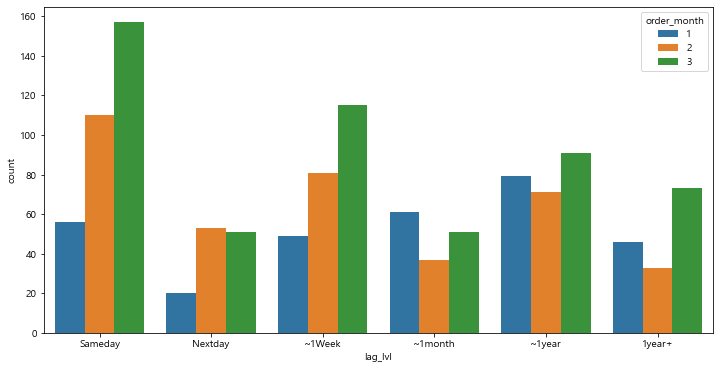

In [38]:
# 3월 구매자 중 당일가입자 비중이 1,2월에 비해 높음
plt.figure(figsize = (12,6))
g = sns.barplot(x = 'lag_lvl', y = 'count', hue = 'order_month', data = df_month_lvl)

In [39]:
df_jan_users = df.loc[df['order_month'] == 1, 'user'].tolist()
df_feb_users = df.loc[df['order_month'] == 2, 'user'].tolist()
df_mar_users = df.loc[df['order_month'] == 3, 'user'].tolist()

df_jan = df_month[df_month['user'].isin(df_jan_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_feb = df_month[df_month['user'].isin(df_feb_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_mar = df_month[df_month['user'].isin(df_mar_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [40]:
df_jan

,lag_lvl,count,pct
0,Sameday,56,18.0
1,Nextday,20,6.4
2,~1Week,49,15.8
3,~1month,61,19.6
4,~1year,79,25.4
5,1year+,46,14.8


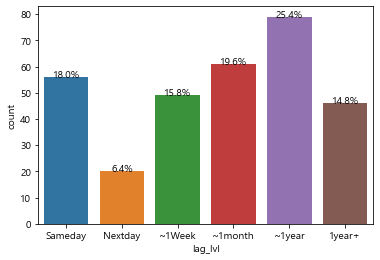

In [41]:
# 1월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_jan)
for index, row in df_jan.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

In [42]:
df_feb

,lag_lvl,count,pct
0,Sameday,110,28.6
1,Nextday,53,13.8
2,~1Week,81,21.0
3,~1month,37,9.6
4,~1year,71,18.4
5,1year+,33,8.6


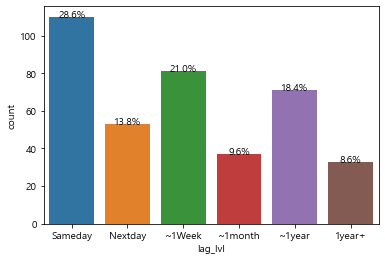

In [43]:
# 2월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_feb)
for index, row in df_feb.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

In [44]:
df_mar

,lag_lvl,count,pct
0,Sameday,157,29.2
1,Nextday,51,9.5
2,~1Week,115,21.4
3,~1month,51,9.5
4,~1year,91,16.9
5,1year+,73,13.6


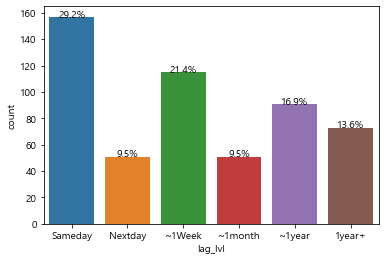

In [45]:
# 3월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_mar)
for index, row in df_mar.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

#### ⚡<b>인사이트</b>⚡
- 1->2->3월로 갈수록 가입당일 주문자 비율이 높아짐 (18% -> 28.6% -> 29.2%)
- 3월에 가입당일 구매를 촉진하기 위한 마케팅 활동이 있었을 수 있음